In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
pd.set_option('display.max_rows', None)
from datetime import datetime

sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [9]:
#!pip install gdown

In [10]:
import gdown

file_id = '1RCyHNbDuAAc3yyBPCamRt8_CmT1GRXuV'

url = f'https://drive.google.com/uc?id={file_id}'

output_file = r'C:\Users\evliy\OneDrive\Desktop\Internship\All_Users.csv'

gdown.download(url, output_file, quiet=False)

df = pd.read_csv(output_file)

Downloading...
From: https://drive.google.com/uc?id=1RCyHNbDuAAc3yyBPCamRt8_CmT1GRXuV
To: /content/C:\Users\evliy\OneDrive\Desktop\Internship\All_Users.csv
100%|██████████| 539k/539k [00:00<00:00, 20.7MB/s]


In [11]:
## Converting the datatype
df['Register Date'] = pd.to_datetime(df['Register Date'])
df['Suspended Date'] = pd.to_datetime(df['Suspended Date'])

In [12]:
df.head()

,Register Date,Suspended Date,Seller ID,Registration Source,Total Account Count,Total Product Count,Total Income,Total Profit,Status,Cancellation Reason,Active Days
0,2019-07-13,2020-09-16,Seller 1,NaN,1,0,0,0,Suspended,NaN,431
1,2019-07-16,2019-10-08,Seller 2,NaN,1,0,0,0,Suspended,NaN,84
2,2019-07-23,2019-10-31,Seller 3,NaN,1,0,0,0,Suspended,NaN,100
3,2019-07-28,2019-08-27,Seller 4,NaN,1,0,0,0,Suspended,NaN,30
4,2019-08-18,2020-01-07,Seller 5,NaN,1,0,0,0,Suspended,NaN,142


In [13]:
from datetime import datetime

current_date = datetime(2023, 8, 20)

df['Churned'] = df['Suspended Date'].notnull()


In [14]:
df.head(1)

,Register Date,Suspended Date,Seller ID,Registration Source,Total Account Count,Total Product Count,Total Income,Total Profit,Status,Cancellation Reason,Active Days,Churned
0,2019-07-13,2020-09-16,Seller 1,NaN,1,0,0,0,Suspended,NaN,431,True


In [15]:
df_3 = df.drop(["Seller ID", "Register Date", "Suspended Date", "Registration Source", "Status", "Cancellation Reason"], axis=1);

In [16]:
data1 = df_3[df_3['Churned']==1]
print("Churn olanlar-data1:"+ str(data1.shape))
data2 = df_3[df_3['Churned']==0]

print("Churn olmayanlar-data2:"+ str(data2.shape))

Churn olanlar-data1:(5939, 6)
Churn olmayanlar-data2:(2370, 6)


In [17]:
# Set the random seed for reproducibility
np.random.seed(42)

# Shuffle the rows of data1 and data2
data1_shuffled = data1.sample(frac=1, random_state=42)
data2_shuffled = data2.sample(frac=1, random_state=42)

# Choose rows from data1 where Total Income or Total Profit > 1
condition = (data1_shuffled['Total Income'] > 1) | (data1_shuffled['Total Profit'] > 1)
selected_data1 = data1_shuffled[condition]

# Randomly select 2370 samples from the selected_data1
random_indices = np.random.choice(selected_data1.index, size=2370, replace=False)
random_data1 = selected_data1.loc[random_indices]

# Combine randomly shuffled data1 with shuffled data2
shuffled_data = pd.concat([data2_shuffled, random_data1])

# Shuffle the rows of the final dataset
final_data = shuffled_data.sample(frac=1, random_state=42)

print("Final Dataset Shape:", final_data.shape)

Final Dataset Shape: (4740, 6)


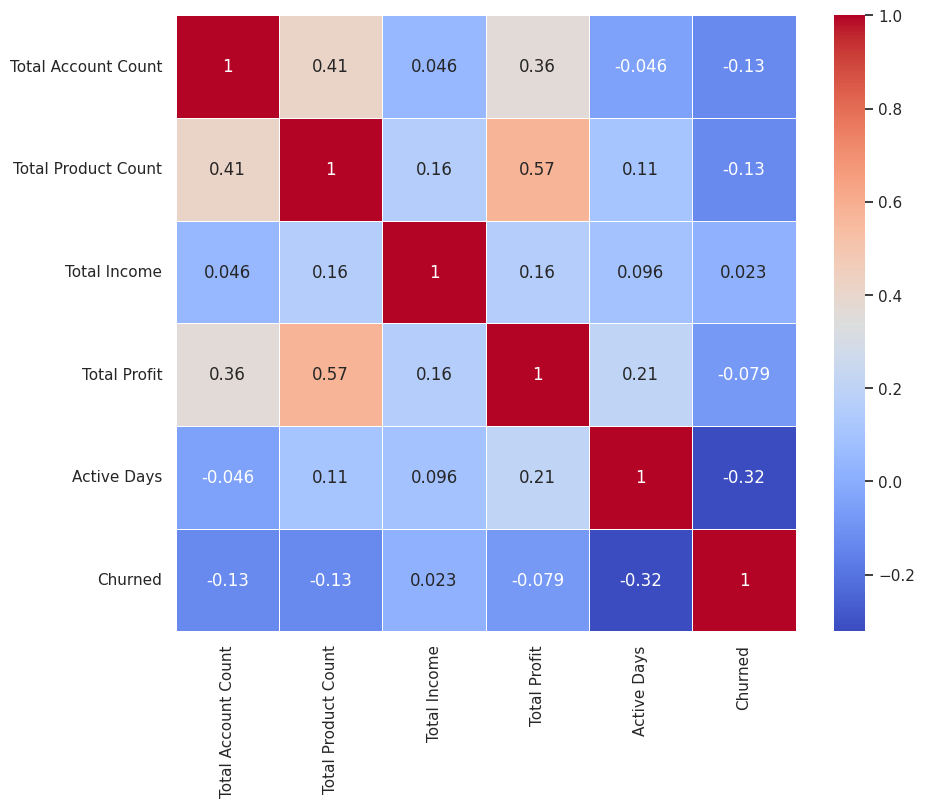

In [18]:
corr_matrix = final_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5);
plt.show()

In [19]:
X = final_data.drop(columns=['Churned'], axis = 1)
y = final_data['Churned']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
## Gradient Boosting

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from yellowbrick.classifier import ClassPredictionError
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5,
                                   min_samples_leaf = 7, min_samples_split = 2, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
#grad_imp_feats = feats.sort_values("grad_importance")

In [23]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[404  51]
 [ 47 446]]
              precision    recall  f1-score   support

       False       0.90      0.89      0.89       455
        True       0.90      0.90      0.90       493

    accuracy                           0.90       948
   macro avg       0.90      0.90      0.90       948
weighted avg       0.90      0.90      0.90       948


Train_Set
[[1855   60]
 [  74 1803]]
              precision    recall  f1-score   support

       False       0.96      0.97      0.97      1915
        True       0.97      0.96      0.96      1877

    accuracy                           0.96      3792
   macro avg       0.96      0.96      0.96      3792
weighted avg       0.96      0.96      0.96      3792



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


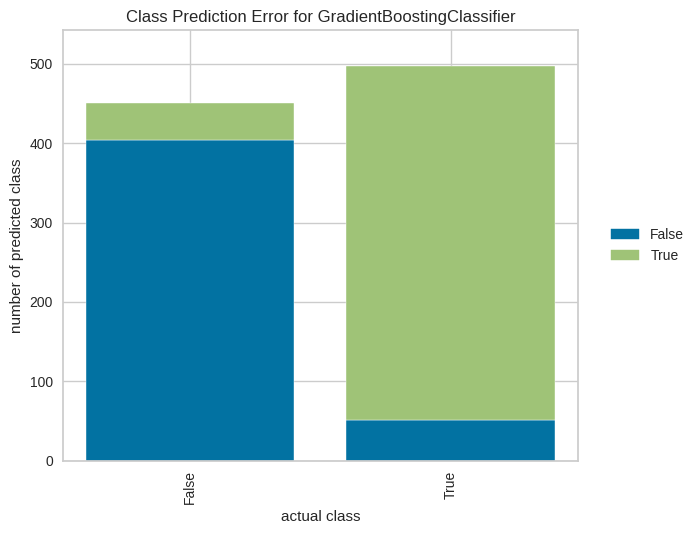

In [24]:
visualizer = ClassPredictionError(model)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

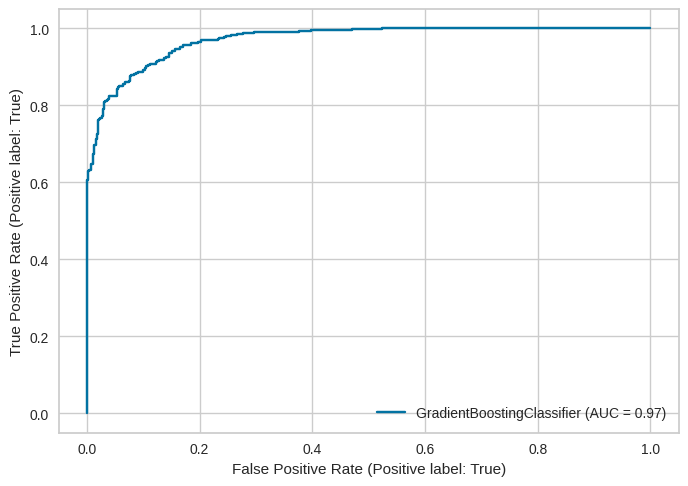

In [25]:
RocCurveDisplay.from_estimator(model, X_test, y_test);

In [30]:
#!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [31]:
#!pip install streamlit
#!pip install ipython
#!pip install openpyxl

import streamlit as st
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from PIL import Image
import shap
from streamlit_shap import st_shap
# Load your trained model
#model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5,
                                   #min_samples_leaf=7, min_samples_split=2, random_state=42)
# Create a SHAP explainer for your model
#explainer = shap.Explainer(model)
#explainer = shap.Explainer(model, user_input)

# Streamlit app
# Main title with yellow highlighting
st.markdown("<h1 style='text-align: center; color: yellow;'>Churn Prediction App</h1>", unsafe_allow_html=True)

st.markdown("<h1 style='text-align: right;'> Enter Features</h1>", unsafe_allow_html=True)

col1, col2 = st.columns([1, 1])
# Display the image in the left column
with col1:
    # Open the image using PIL
    image = Image.open("C:/Users/evliy/OneDrive/Desktop/Internship/logo.jpg")
    # Display the image using Streamlit
    st.image(image, width=320)

# Display the "Enter Features" title and text input elements in the right column
with col2:
    total_account = st.text_input("Total Account Count", "")
    total_products = st.text_input("Total Product Count", "")
    total_income = st.text_input("Total Income", "")
    total_profit = st.text_input("Total Profit", "")
    active_days = st.text_input("Active Days", "")

    if st.button("Predict Churn"):
        # Create a DataFrame from user inputs
        user_input = pd.DataFrame({'Total Account Count': [total_account],
                                   'Total Product Count': [total_products],
                                   'Total Income': [total_income],
                                   'Total Profit': [total_profit],
                                   'Active Days': [active_days]})

        # Convert input values to numeric (assuming they are numeric features)
        user_input = user_input.apply(pd.to_numeric, errors='coerce')

        # Validate that 'Total Account' and 'Active days' are greater than 0
        if (user_input['Total Account Count'].astype(float) <= 0).any() or (user_input['Active Days'].astype(float) <= 0).any():
            st.error("Total Account and Active days must be greater than 0.")
        else:
            prediction = model.predict(user_input)
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(user_input)
            if prediction[0] == True:
                st.markdown("<span style='background-color:red; color:black; font-size:20px;'>Seller is predicted to churn</span>", unsafe_allow_html=True)
                st.subheader("Decision SHAP Plot Shows Importance of Features")
                if len(shap_values) > 0:
                    st_shap(shap.decision_plot(explainer.expected_value, shap_values[0,:], user_input.iloc[0,:], link='logit'), height=300, width=600)
                else:
                    st.warning("SHAP values for Class True are not available.")
            else:
                st.markdown("<span style='background-color:green; color:black; font-size:20px;'>Seller is predicted not to churn</span>",unsafe_allow_html=True)
                st.subheader("Decision SHAP Plot Shows Importance of Features")
                if len(shap_values) > 0:
                    st_shap(shap.decision_plot(explainer.expected_value, shap_values[0,:], user_input.iloc[0,:], link='logit'), height=300, width=600)
                else:
                    st.warning("SHAP values for Class False are not available.")

# Show two sample values from your dataset, one with Churned=True and one with Churned=False
st.subheader("Selected Sample Rows")
selected_row_1 = df.iloc[2459]
selected_row_2 = df.iloc[6844]
# Display the selected rows horizontally
st.dataframe([selected_row_1, selected_row_2])

# Add a section to allow users to upload an Excel file
st.subheader("Upload Excel File for Batch Predictions")
uploaded_file = st.file_uploader("Upload Excel File (with 5 features)", type=["xlsx", "xls"])

if uploaded_file is not None:
    # Read the uploaded Excel file into a DataFrame
    user_data = pd.read_excel(uploaded_file)

    # Ensure the DataFrame has the expected columns (Total Income, Total Profit, Active days, Total Account, Total Products)
    expected_columns = ['Total Account Count', 'Total Product Count', 'Total Income', 'Total Profit', 'Active Days']
    if set(expected_columns).issubset(user_data.columns):
        # Validate that 'Total Account' and 'Active days' are greater than 0
        if (user_data['Total Account Count'].astype(float) <= 0).any() or (user_data['Active Days'].astype(float) <= 0).any():
            st.error("Total Account and Active days must be greater than 0 in the uploaded file.")
        else:
            # Make predictions using your model
            predictions = model.predict(user_data)

            # Create a new DataFrame with predictions
            predictions_df = pd.DataFrame({'Predictions': predictions})

            # Combine the input data and predictions
            result_df = pd.concat([user_data, predictions_df], axis=1)

            # Provide a download link for the predictions as an Excel file
            st.subheader("Predictions")
            st.write(result_df)
            st.write("Download Predictions as Excel:")
            st.button("Download Predictions", on_click=download_predictions, args=(result_df,))
    else:
        st.error("Please upload an Excel file with the correct columns: Total Account Count, Total Product Count, Total Income, Total Profit, Active Days")

# Function to download predictions as an Excel file
def download_predictions(result_df):
    result_df.to_excel("churn_predictions.xlsx", index=False)
    st.success("Predictions downloaded as 'churn_predictions.xlsx'")


2023-09-30 19:05:06.661 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [33]:
#!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.7 MB/s eta 0:00:00
